In [1]:
import sys
sys.path.append('../..')
import ugent

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from pyslise import PyslisePeriodic, Pyslise
from math import pi

def V(x):
    return 3*x*x*(pi-x)

periodic = PyslisePeriodic(V, 0, pi, tolerance=1e-14)
forward = Pyslise(V, 0, pi, tolerance=1e-14)

eigs = periodic.eigenvaluesByIndex(0, 10)
print(eigs)

[(0, 4.3018482904455375, 1), (1, 11.075846483818362, 1), (2, 14.031553319790294, 1), (3, 24.047387349500138, 1), (4, 24.189738198817437, 1), (5, 43.86049447489741, 1), (6, 43.9586891894956, 1), (7, 71.80848955773388, 1), (8, 71.8708988995195, 1), (9, 107.78659112882627, 1)]


In [3]:
import numpy as np

m = forward.__sector(forward.__matchIndex).max

def error(E):
    ln, lnt = forward.propagate(E, (1, 0), 0, m)
    rn, rnt = forward.propagate(E, (1, 0), pi, m)
    
    ld, ldt = forward.propagate(E, (0, 1), 0, m)
    rd, rdt = forward.propagate(E, (0, 1), pi, m)
    
    return np.array([ln - rn, ld - rd]).T, np.array([lnt - rnt, ldt - rdt + pi])
    
def binary_search(f, left, right):
    assert f(left) * f(right) <= 0
    while right - left > 1e-8:
        c = (left + right) / 2
        if f(c) * f(left) > 0:
            left = c
        else:
            right = c
    c = (left + right) / 2
    return c

error(4.4)

(array([[-120.74812373,  105.30753737],
        [  45.70446776,  -39.95493355]]),
 array([0.57746757, 2.12809046]))

In [4]:
from math import pi

k = 2
E1 = binary_search(lambda E: np.min(error(E)[1]) + pi - k*pi, -100, 300)
E2 = binary_search(lambda E: np.max(error(E)[1]) - pi - k*pi, -100, 300)
E1, E2

(8.064021289465018, 17.344395475811325)

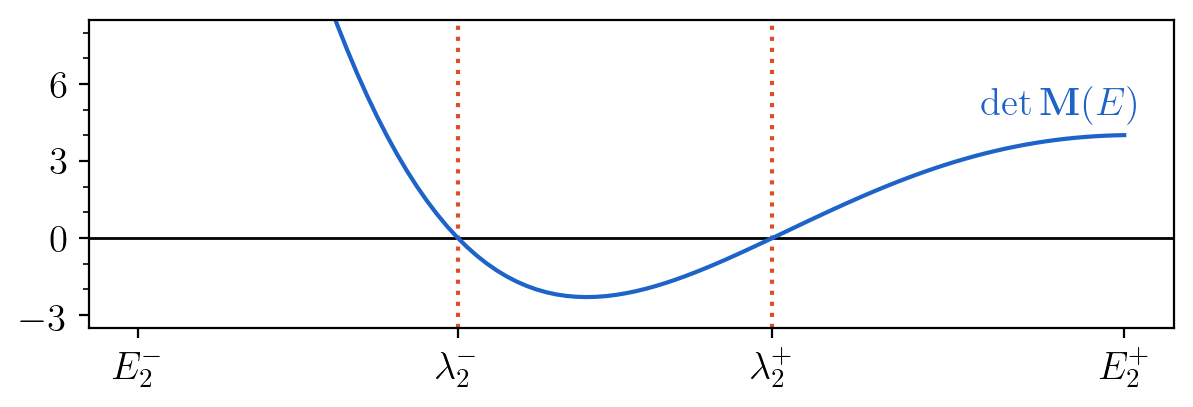

In [5]:
Es = np.linspace(E1, E2, 100)

dets = np.array([np.linalg.det(error(E)[0]) for E in Es])

fig, ax = plt.subplots(1,1, figsize=(7, 2), dpi=200)

(_, l1, _), (_, l2, _) =  eigs[1:3]

ax.axhline(0, color="black", lw=1)
ax.axvline(l1, color=ugent.rood, ls=":")
ax.axvline(l2, color=ugent.rood, ls=":")
ax.plot(Es, dets, color=ugent.blauw)
ax.text(16, 4.8, "$\\det\\vb{M}(E)$", color=ugent.blauw)
ax.set_yticks([-3, 0, 3, 6])
ax.set_yticks(range(-20, 20), minor=True)
ax.set_xticks([E1, l1, l2, E2])
ax.set_xticklabels(["$E_2^{-}$", "$\\lambda_2^{-}$", "$\\lambda_2^{+}$", "$E_2^{+}$"])
ax.set_ylim(-3.5,8.5)
plt.savefig('periodic_matching.pdf', bbox_inches="tight")

In [158]:
l1, l2

(11.075846483818362, 14.031553319790294)